# Transfer Learning

In [24]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


## Loading images and labels
(train_ds, train_labels), (test_ds, test_labels) = tfds.load(
    "tf_flowers",
    split=["train[:70%]", "train[:30%]"], ## Train test split
    batch_size=-1,
    as_supervised=True,  # Include labels
)

## Resizing images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
base_model.trainable = False ## Not trainable weights

## Preprocessing input
train_ds = preprocess_input(train_ds) 
test_ds = preprocess_input(test_ds)

58900480/58889256 [==============================] - 1s 0us/step


In [3]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [4]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

hostory_tl = model.fit(train_ds, train_labels, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/50
65/65 [==============================] - 19s 121ms/step - loss: 1.8362 - accuracy: 0.4642 - val_loss: 1.1286 - val_accuracy: 0.6128
Epoch 2/50
65/65 [==============================] - 6s 94ms/step - loss: 0.9070 - accuracy: 0.6929 - val_loss: 1.0186 - val_accuracy: 0.6518
Epoch 3/50
65/65 [==============================] - 6s 94ms/step - loss: 0.6497 - accuracy: 0.7640 - val_loss: 1.0359 - val_accuracy: 0.7082
Epoch 4/50
65/65 [==============================] - 6s 94ms/step - loss: 0.5160 - accuracy: 0.8078 - val_loss: 1.0479 - val_accuracy: 0.6926
Epoch 5/50
65/65 [==============================] - 6s 96ms/step - loss: 0.3755 - accuracy: 0.8613 - val_loss: 1.0905 - val_accuracy: 0.7198
Epoch 6/50
65/65 [==============================] - 6s 95ms/step - loss: 0.3118 - accuracy: 0.8920 - val_loss: 1.1753 - val_accuracy: 0.6868
Epoch 7/50
65/65 [==============================] - 6s 95ms/step - loss: 0.2519 - accuracy: 0.9080 - val_loss: 1.2518 - val_accuracy: 0.7101
Epoch 8/50


In [6]:
model.evaluate(test_ds, test_labels)

35/35 [==============================] - 4s 105ms/step - loss: 0.3075 - accuracy: 0.8965


[0.30751436948776245, 0.8964577913284302]

# Normal Training

In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical

## Loading images and labels
(train_ds, train_labels), (test_ds, test_labels) = tfds.load(
    "tf_flowers",
    split=["train[:70%]", "train[:30%]"], ## Train test split
    batch_size=-1,
    as_supervised=True,  # Include labels
)

## Resizing images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

In [8]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights=None, include_top=False, input_shape=train_ds[0].shape)
base_model.trainable = False ## Not trainable weights

## Preprocessing input
train_ds = preprocess_input(train_ds) 
test_ds = preprocess_input(test_ds)

In [9]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = model.fit(train_ds, train_labels, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/50
65/65 [==============================] - 7s 102ms/step - loss: 1.6390 - accuracy: 0.1869 - val_loss: 1.6113 - val_accuracy: 0.2490
Epoch 2/50
65/65 [==============================] - 6s 97ms/step - loss: 1.5945 - accuracy: 0.2560 - val_loss: 1.5856 - val_accuracy: 0.2665
Epoch 3/50
65/65 [==============================] - 6s 96ms/step - loss: 1.5721 - accuracy: 0.2803 - val_loss: 1.5981 - val_accuracy: 0.2588
Epoch 4/50
65/65 [==============================] - 6s 97ms/step - loss: 1.5459 - accuracy: 0.3158 - val_loss: 1.5416 - val_accuracy: 0.3268
Epoch 5/50
65/65 [==============================] - 6s 98ms/step - loss: 1.5209 - accuracy: 0.3280 - val_loss: 1.5429 - val_accuracy: 0.3385
Epoch 6/50
65/65 [==============================] - 6s 97ms/step - loss: 1.5217 - accuracy: 0.3178 - val_loss: 1.5176 - val_accuracy: 0.3288
Epoch 7/50
65/65 [==============================] - 6s 98ms/step - loss: 1.5166 - accuracy: 0.3392 - val_loss: 1.5064 - val_accuracy: 0.3463
Epoch 8/50
6

In [11]:
model.evaluate(test_ds, test_labels)

35/35 [==============================] - 3s 80ms/step - loss: 1.3018 - accuracy: 0.4823


[1.3018332719802856, 0.48228883743286133]

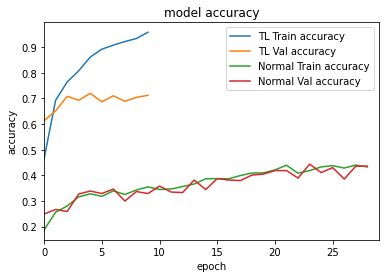

In [29]:
metrics = hostory_tl.history
# summarize metrics for accuracy
plt.plot(list(metrics['accuracy']), label="TL Train accuracy")
plt.plot(list(metrics['val_accuracy']), label="TL Val accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xlim(0, len(metrics['accuracy']))
# plt.ylim(0, max(max_accuracy, max_valaccuracy))

metrics = history.history
# summarize metrics for accuracy
plt.plot(list(metrics['accuracy']), label="Normal Train accuracy")
plt.plot(list(metrics['val_accuracy']), label="Normal Val accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xlim(0, len(metrics['accuracy']))
# plt.ylim(0, max(max_accuracy, max_valaccuracy))
plt.legend()
plt.show()